<a href="https://colab.research.google.com/github/divyeeee/Name-Classifier-with-RNNs/blob/main/hehe69RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
divyeeee_names_and_nationality_path = kagglehub.dataset_download('divyeeee/names-and-nationality')

print('Data source import complete.')


In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# # We will detect from which country the name is
# import os
# import io
# import unicodedata
# import string
# import glob

# import torch
# import random


In [ ]:
# data: https://download.pytorch.org/tutorial/data.zip
import io
import os
import unicodedata
import string
import glob

import torch
import random

# alphabet small + capital letters + " .,;'"
ALL_LETTERS = string.ascii_letters + " .,;'"
N_LETTERS = len(ALL_LETTERS)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in ALL_LETTERS
    )

def load_data():
    # Build the category_lines dictionary, a list of names per language
    category_lines = {}
    all_categories = []

    def find_files(path):
        return glob.glob(path)

    # Read a file and split into lines
    def read_lines(filename):
        lines = io.open(filename, encoding='utf-8').read().strip().split('\n')
        return [unicode_to_ascii(line) for line in lines]

    for filename in find_files('/kaggle/input/names-and-nationality/data/names/*.txt'):
        category = os.path.splitext(os.path.basename(filename))[0]
        all_categories.append(category)

        lines = read_lines(filename)
        category_lines[category] = lines

    return category_lines, all_categories



"""
To represent a single letter, we use a “one-hot vector” of
size <1 x n_letters>. A one-hot vector is filled with 0s
except for a 1 at index of the current letter, e.g. "b" = <0 1 0 0 0 ...>.

To make a word we join a bunch of those into a
2D matrix <line_length x 1 x n_letters>.

That extra 1 dimension is because PyTorch assumes
everything is in batches - we’re just using a batch size of 1 here.
"""

# Find letter index from all_letters, e.g. "a" = 0
def letter_to_index(letter):
    return ALL_LETTERS.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letter_to_tensor(letter):
    tensor = torch.zeros(1, N_LETTERS)
    tensor[0][letter_to_index(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def line_to_tensor(line):
    tensor = torch.zeros(len(line), 1, N_LETTERS)
    for i, letter in enumerate(line):
        tensor[i][0][letter_to_index(letter)] = 1
    return tensor


def random_training_example(category_lines, all_categories):

    def random_choice(a):
        random_idx = random.randint(0, len(a) - 1)
        return a[random_idx]

    category = random_choice(all_categories)
    line = random_choice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = line_to_tensor(line)
    return category, line, category_tensor, line_tensor



print(ALL_LETTERS)
print(unicode_to_ascii('Ślusàrski'))

category_lines, all_categories = load_data()
# print(category_lines)
print(all_categories)
print(category_lines['Italian'][:5])

print(letter_to_tensor('J')) # [1, 57]
print(line_to_tensor('Jones').size()) # [5, 1, 57]

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'
Slusarski
['Vietnamese', 'Greek', 'Japanese', 'Dutch', 'Irish', 'Russian', 'Korean', 'Scottish', 'Czech', 'Italian', 'Arabic', 'Portuguese', 'Spanish', 'Chinese', 'French', 'English', 'German', 'Polish']
['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


Arabic
5000 5.0 2.1608 Abbatelli / Polish WRONG (Italian)
10000 10.0 2.8945 Mustafa / Japanese WRONG (Arabic)
15000 15.0 3.2435 Masuzoe / Scottish WRONG (Japanese)
20000 20.0 2.4052 Marquerink / Italian WRONG (German)
25000 25.0 2.6323 Daalen / Irish WRONG (Dutch)
30000 30.0 1.5177 Samaha / Japanese WRONG (Arabic)
35000 35.0 2.1529 Machado / Japanese WRONG (Portuguese)
40000 40.0 0.9064 Benitez / Spanish CORRECT
45000 45.0 0.6721 Yun / Chinese CORRECT
50000 50.0 0.6943 Hong / Chinese CORRECT
55000 55.00000000000001 0.7989 Ganim / Arabic CORRECT
60000 60.0 0.3822 Malouf / Arabic CORRECT
65000 65.0 0.0357 Bouloukos / Greek CORRECT
70000 70.0 1.1713 Granger / French CORRECT
75000 75.0 0.3488 Talkovsky / Russian CORRECT
80000 80.0 0.8653 Castro / Portuguese CORRECT
85000 85.0 1.0778 Molyavin / Russian CORRECT
90000 90.0 0.8855 Palmeiro / Portuguese CORRECT
95000 95.0 0.6389 Vela / Spanish CORRECT
100000 100.0 1.9422 Davenport / Dutch WRONG (English)


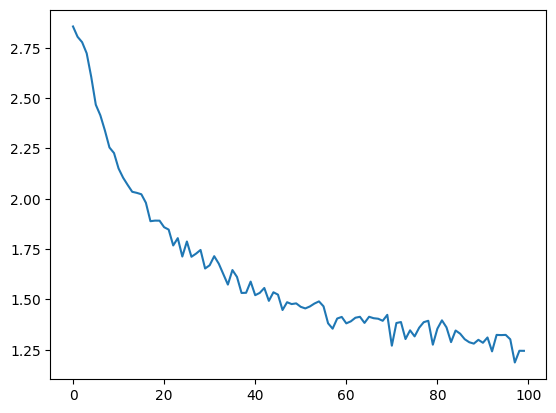

Input: arabic



> arabic
Arabic


Input: divye



> divye
French


Input: kartikey



> kartikey
Russian


Input: sarthak



> sarthak
Polish


Input: andrew



> andrew
Spanish


Input: sakura



> sakura
Japanese


Input: mizu



> mizu
Portuguese


Input: mizumoto



> mizumoto
Japanese


Input: vladmir



> vladmir
Czech


Input: mahmoud



> mahmoud
Arabic


Input: cheng pao



> cheng pao
Spanish


Input: cheng



> cheng
Chinese


Input: liu



> liu
Scottish


Input: liuhan



> liuhan
Irish


Input: seong



> seong
German


Input: han-seong



> han-seong
Irish


Input: han-seong



> han-seong
Irish


Input: miguel



> miguel
English


Input: michael



> michael
French


Input: mikkel



> mikkel
Dutch


Input: yun



> yun
Korean


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# from utils import ALL_LETTERS, N_LETTERS
# from utils import load_data, letter_to_tensor, line_to_tensor, random_training_example


class RNN(nn.Module):
    # implement RNN from scratch rather than using nn.RNN
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_tensor, hidden_tensor):
        combined = torch.cat((input_tensor, hidden_tensor), 1)

        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

category_lines, all_categories = load_data()
n_categories = len(all_categories)

n_hidden = 128
rnn = RNN(N_LETTERS, n_hidden, n_categories)

# one step
input_tensor = letter_to_tensor('A')
hidden_tensor = rnn.init_hidden()

output, next_hidden = rnn(input_tensor, hidden_tensor)
#print(output.size())
#print(next_hidden.size())

# whole sequence/name
input_tensor = line_to_tensor('Albert')
hidden_tensor = rnn.init_hidden()

output, next_hidden = rnn(input_tensor[0], hidden_tensor)
#print(output.size())
#print(next_hidden.size())

#
def category_from_output(output):
    category_idx = torch.argmax(output).item()
    return all_categories[category_idx]

print(category_from_output(output))

criterion = nn.NLLLoss()
learning_rate = 0.005
optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)

def train(line_tensor, category_tensor):
    hidden = rnn.init_hidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return output, loss.item()

current_loss = 0
all_losses = []
plot_steps, print_steps = 1000, 5000
n_iters = 100000
for i in range(n_iters):
    category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)

    output, loss = train(line_tensor, category_tensor)
    current_loss += loss

    if (i+1) % plot_steps == 0:
        all_losses.append(current_loss / plot_steps)
        current_loss = 0

    if (i+1) % print_steps == 0:
        guess = category_from_output(output)
        correct = "CORRECT" if guess == category else f"WRONG ({category})"
        print(f"{i+1} {(i+1)/n_iters*100} {loss:.4f} {line} / {guess} {correct}")


plt.figure()
plt.plot(all_losses)
plt.show()

def predict(input_line):
    print(f"\n> {input_line}")
    with torch.no_grad():
        line_tensor = line_to_tensor(input_line)

        hidden = rnn.init_hidden()

        for i in range(line_tensor.size()[0]):
            output, hidden = rnn(line_tensor[i], hidden)

        guess = category_from_output(output)
        print(guess)


while True:
    sentence = input("Input:")
    if sentence == "quit":
        break

    predict(sentence)
